In [4]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

#### 1.Problem Statement

In [ ]:
To predict diabetic condition using following variables.
1.age
2.sex
3.bmi
4.bp
5.s1
6.s2
7.s3
8.s4
9.s5
10.s6

#### 2.Data Gathering

In [6]:
df = pd.read_csv(r"D:\DATA SCIENCE\Linear_Regression_Model\Diabetes\static\csv_files\diabetes_data.csv")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#### 3.Exploratory Data Analysis

##### 1.Missing value

In [7]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
TARGET    0
dtype: int64

In [ ]:
DataFrame contains no missing values

##### 2.Categorical Data(Object DataType)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  TARGET  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [9]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
TARGET    float64
dtype: object

In [ ]:
DataFrame has no categorical data(object data type)

#### 4.Feature Engineering

In [ ]:
No need to perform feature engineering as DataFrame contains no missing value and no object data type

#### 5.Feature selection

##### 1.Linearity

In [10]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


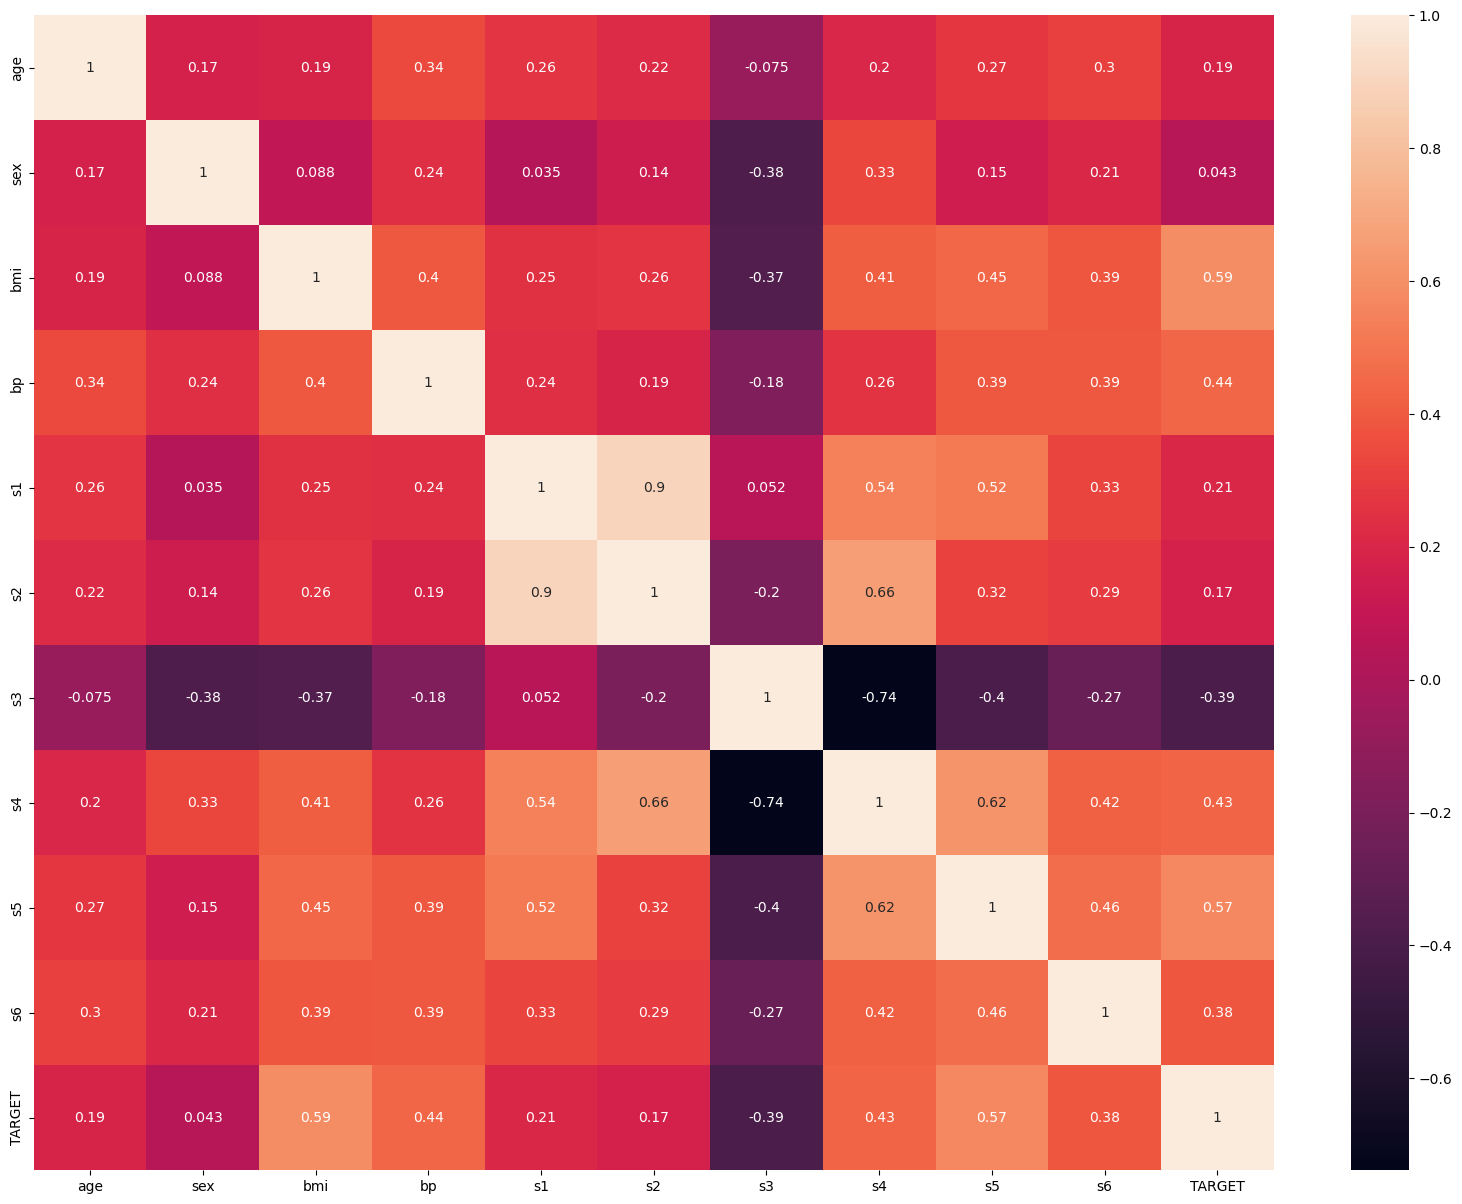

In [11]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.savefig('Diabetes_corr.png')

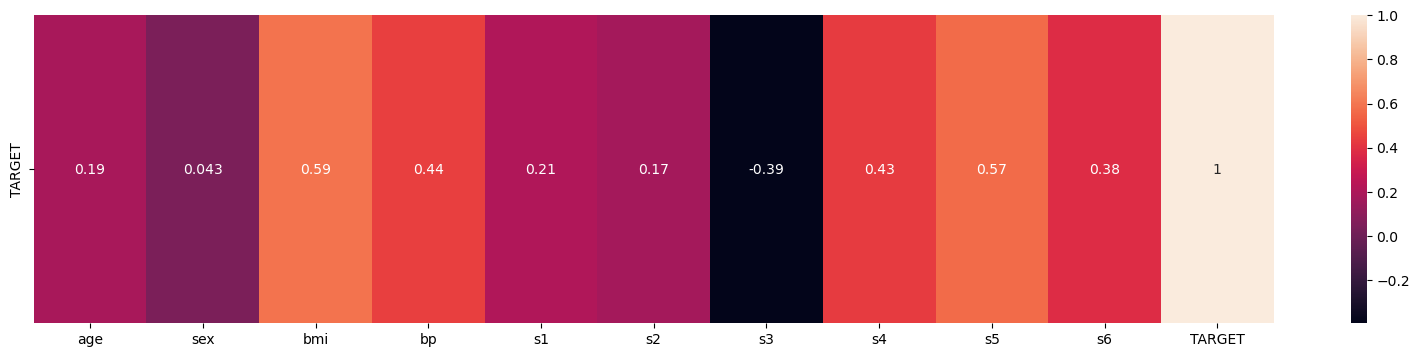

In [12]:
plt.figure(figsize = (20,4))
sns.heatmap(df.corr().tail(1),annot = True)
plt.savefig('Diabetes_corr.png')

#### 2.No Multicolinearity

In [13]:
x = df.drop('TARGET',axis = 1)
y = df['TARGET']

In [14]:
x.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [15]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list

[1.2173065138070074,
 1.2780710154103623,
 1.5094373738445481,
 1.4594277776838305,
 59.202510134319006,
 39.1933699727707,
 15.40215600751348,
 8.890986360329643,
 10.075967132038347,
 1.4846226073834827]

In [16]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)

vif_values = pd.Series(vif_list,index = x.columns)
vif_values

age     1.217307
sex     1.278071
bmi     1.509437
bp      1.459428
s1     59.202510
s2     39.193370
s3     15.402156
s4      8.890986
s5     10.075967
s6      1.484623
dtype: float64

<Axes: >

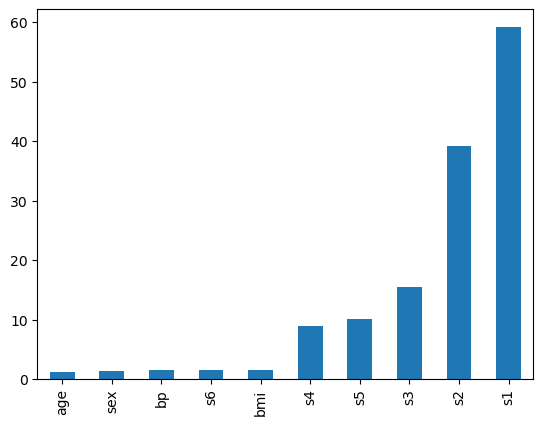

In [17]:
vif_values.sort_values().plot(kind = 'bar')

#### 6 Model Training

In [18]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [19]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: TARGET, Length: 442, dtype: float64

##### Data Spliting

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,
                                                random_state = 2)

In [21]:
x_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343
37,-0.009147,-0.044642,0.011039,-0.057313,-0.024960,-0.042963,0.030232,-0.039493,0.017036,-0.005220
170,0.023546,0.050680,-0.020218,-0.036656,-0.013953,-0.015092,0.059685,-0.039493,-0.096435,-0.017646
400,-0.023677,-0.044642,0.045529,0.090729,-0.018080,-0.035447,0.070730,-0.039493,-0.034522,-0.009362
286,-0.038207,-0.044642,-0.054707,-0.077970,-0.033216,-0.086490,0.140681,-0.076395,-0.019198,-0.005220
...,...,...,...,...,...,...,...,...,...,...
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025953,-0.001078
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061176,-0.013504
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036060,-0.042499


In [22]:
y_train

70      48.0
37     276.0
170     47.0
400    175.0
286     60.0
       ...  
299     83.0
22      68.0
72     202.0
15     171.0
168    268.0
Name: TARGET, Length: 353, dtype: float64

In [23]:
x_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
212,0.067136,-0.044642,0.003494,0.035644,0.049341,0.031254,0.070730,-0.039493,-0.000612,0.019633
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362
67,0.041708,0.050680,-0.014828,-0.017135,-0.005697,0.008394,-0.013948,-0.001854,-0.011897,0.003064
89,-0.045472,-0.044642,-0.048241,-0.019442,-0.000193,-0.016032,0.067048,-0.039493,-0.024795,0.019633
390,0.009016,0.050680,0.069241,0.059744,0.017694,-0.023234,-0.047082,0.034309,0.103297,0.073480
...,...,...,...,...,...,...,...,...,...,...
129,0.009016,-0.044642,0.016428,0.004658,0.009439,0.010586,-0.028674,0.034309,0.038968,0.119043
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
332,0.030811,-0.044642,0.104809,0.076958,-0.011201,-0.011335,-0.058127,0.034309,0.057108,0.036201
150,0.023546,-0.044642,0.070319,0.025315,-0.034592,-0.014466,-0.032356,-0.002592,-0.019198,-0.009362


In [24]:
y_test

212     73.0
422    233.0
67      97.0
89     111.0
390    277.0
       ...  
129    268.0
417     55.0
332    270.0
150    288.0
192     91.0
Name: TARGET, Length: 89, dtype: float64

#### Creating Instance of linear Regression

In [25]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [26]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [27]:
linear_reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [28]:
np.around(linear_reg.coef_,2)

array([  -9.16, -205.45,  516.69,  340.62, -895.55,  561.22,  153.89,
        126.73,  861.13,   52.42])

In [29]:
linear_reg.intercept_

151.88331005254165

In [30]:
np.around(linear_reg.intercept_,1)

151.9

#### 7.Model Evaluation

##### 1.Testing Data Evaluation

In [31]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_test,y_pred)
print(" R_Square value is :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)


Mean Squared Error is : 3094.456671566064
Root Mean Squared Error is : 55.62784079546917
 Mean absolute Error is : 45.21303419046903
 R_Square value is : 0.43993386615689656
Adjusted R_Square value is : 0.36813051566419097


##### 2.1.Training Data Evaluation

In [32]:
y_pred_train  = linear_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_train,y_pred_train)
print(" R_Square value is :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)

Mean Squared Error is : 2814.21359234292
Root Mean Squared Error is : 53.04916203242913
 Mean absolute Error is : 42.91623353136605
 R_Square value is : 0.5323672232993288
Adjusted R_Square value is : 0.5186937502963852


In [33]:
r_squared_list = []
adj_r2_list = []
for i in range(1,x_train.shape[1]+1):
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(x_train.iloc[:,:i],y_train)
    r2_value = linear_reg_model.score(x_train.iloc[:,:i],y_train)
    r_squared_list.append(r2_value)
    
    n = x_train.shape[0]
    k = i
    adj_r2 = 1-((1-r2_value)*(n-1))/(n-k-1)
    adj_r2_list.append(adj_r2)

In [34]:
r_squared_list

[0.05052807494551559,
 0.05074264054632849,
 0.362565189327153,
 0.40995707769352907,
 0.4106099133023613,
 0.4155038123129504,
 0.5022810103661832,
 0.5025803294254669,
 0.5316915603267744,
 0.5323672232993288]

In [35]:
adj_r2_list

[0.04782302672598715,
 0.045318312778021785,
 0.35708580700045234,
 0.40317497513828227,
 0.40211726075628584,
 0.4053680402721346,
 0.49218236419969996,
 0.49101243010978013,
 0.5194035837755819,
 0.5186937502963852]

In [36]:
new_x_train = x_train.copy()
new_x_train['TARGET'] = y_train
new_x_train.corr()['TARGET']

age       0.224785
sex       0.053885
bmi       0.594592
bp        0.459661
s1        0.218839
s2        0.175718
s3       -0.382782
s4        0.421328
s5        0.582935
s6        0.367692
TARGET    1.000000
Name: TARGET, dtype: float64

In [37]:
r2_data = {'Correlation':new_x_train.corr()['TARGET'],
           'R_Squared':r_squared_list,
       'Adj R_Squared':adj_r2_list
           }
r2_df = pd.DataFrame(r2_data, index = x_train.columns)
r2_df

,Correlation,R_Squared,Adj R_Squared
age,0.224785,0.050528,0.047823
sex,0.053885,0.050743,0.045318
bmi,0.594592,0.362565,0.357086
bp,0.459661,0.409957,0.403175
s1,0.218839,0.410610,0.402117
s2,0.175718,0.415504,0.405368
s3,-0.382782,0.502281,0.492182
s4,0.421328,0.502580,0.491012
s5,0.582935,0.531692,0.519404
s6,0.367692,0.532367,0.518694


#### Assumptions

##### 1.Normality of Residual

In [38]:
residual = y_train - y_pred_train
residual

70     -21.588948
37     116.393681
170      4.439502
400    -12.660502
286    -22.948545
          ...    
299    -40.561743
22     -40.763421
72      52.220538
15      -5.920235
168     45.515403
Name: TARGET, Length: 353, dtype: float64

##### Checking Normality of residual

##### 1.kdeplot

<Axes: xlabel='TARGET', ylabel='Density'>

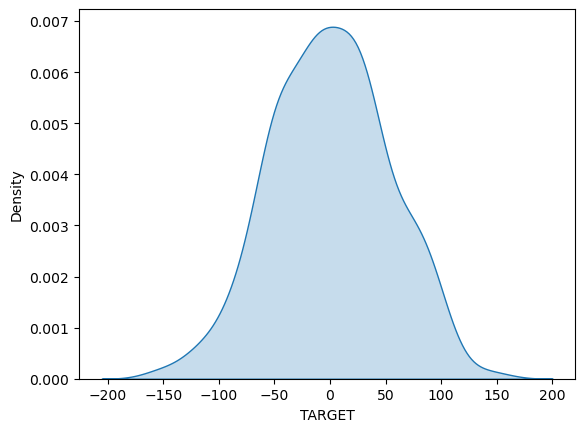

In [39]:
sns.kdeplot(residual,fill = True)

##### 2.Histplot

<Axes: xlabel='TARGET', ylabel='Count'>

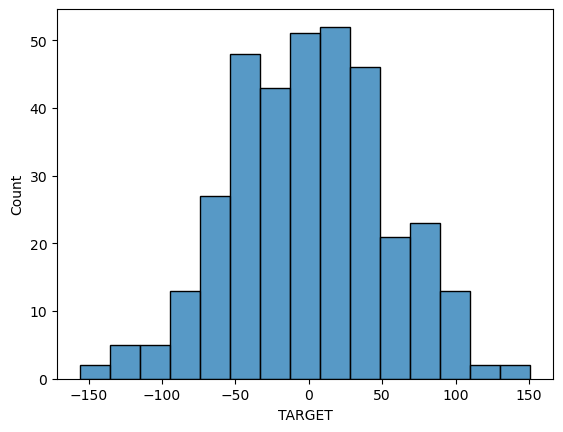

In [40]:
sns.histplot(residual)

<Axes: xlabel='TARGET', ylabel='Count'>

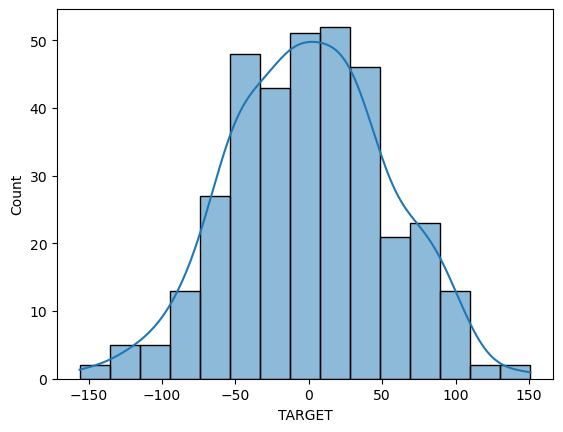

In [41]:
sns.histplot(residual,kde = True)

##### 3.Distplot

<Axes: xlabel='TARGET', ylabel='Density'>

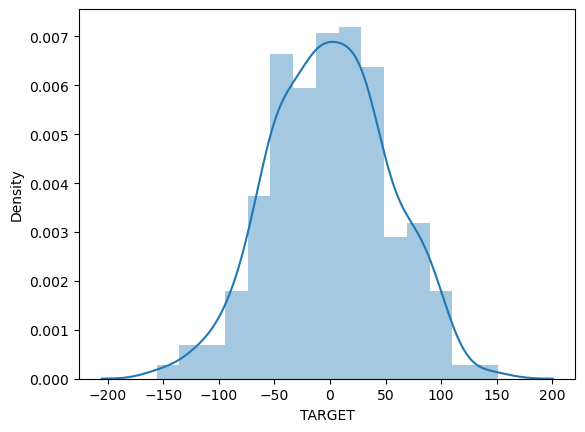

In [42]:
sns.distplot(residual)

##### 2.QQ Plot

In [43]:
import statsmodels.api as sm

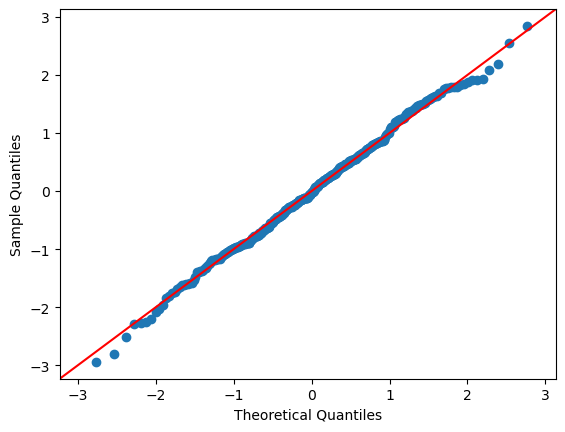

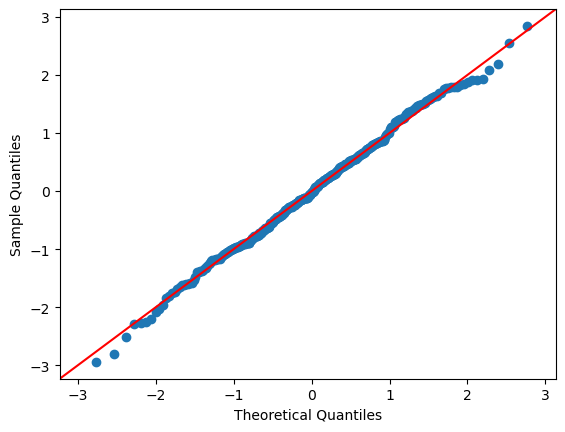

In [44]:
sm.qqplot(residual,line = "45",fit = True)

##### 3.Hypothesis testing

##### 1.shapiro testing

In [45]:
from scipy.stats import shapiro

In [46]:
stats,p_val = shapiro(residual)
print(stats)
print(p_val)

0.9967445731163025
0.6996665000915527


In [47]:
_,p_val = shapiro(residual)
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 0.6996665000915527
Data is normally distributed
Null hypothesis is true


##### 2.ks test

In [48]:
from scipy.stats import kstest

In [49]:
residual = y_train - y_pred_train
residual

70     -21.588948
37     116.393681
170      4.439502
400    -12.660502
286    -22.948545
          ...    
299    -40.561743
22     -40.763421
72      52.220538
15      -5.920235
168     45.515403
Name: TARGET, Length: 353, dtype: float64

In [50]:
_,p_val = kstest(residual,'norm')
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 1.8936020842137222e-79
Data is not normally distributed
Alternate hypothesis is true


#### 3.Normal test

In [51]:
from scipy.stats import normaltest

In [52]:
_, p_val = normaltest(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 0.7482066883014913
Data is normally distributed
NULL Hypothesis is True


##### 4.Skewness

In [53]:
from scipy.stats import skew

Mean     : 1.5619862973083223e-14
Median   : -1.1315728102854905
Skewness : -0.03812071096968221
Skewness : -0.03795853336407959


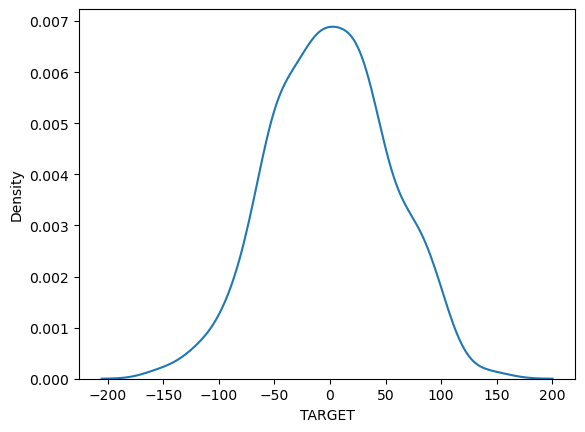

In [54]:
sns.kdeplot(residual)
s1 = residual
print('Mean     :',s1.mean())
print('Median   :',s1.median())
print('Skewness :',s1.skew())
print('Skewness :',skew(s1))

#### 4 .Homoscedascticity

In [55]:
y_train

70      48.0
37     276.0
170     47.0
400    175.0
286     60.0
       ...  
299     83.0
22      68.0
72     202.0
15     171.0
168    268.0
Name: TARGET, Length: 353, dtype: float64

In [56]:
y_pred_train
residual_train = y_train-y_pred_train
residual

70     -21.588948
37     116.393681
170      4.439502
400    -12.660502
286    -22.948545
          ...    
299    -40.561743
22     -40.763421
72      52.220538
15      -5.920235
168     45.515403
Name: TARGET, Length: 353, dtype: float64

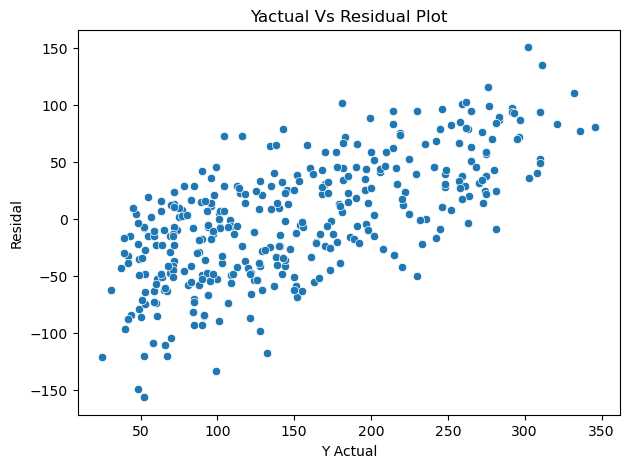

In [57]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual Plot")
plt.savefig('Homoscedasticity.png')

#### Single Row Testing

In [58]:
x_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
212,0.067136,-0.044642,0.003494,0.035644,0.049341,0.031254,0.070730,-0.039493,-0.000612,0.019633
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362
67,0.041708,0.050680,-0.014828,-0.017135,-0.005697,0.008394,-0.013948,-0.001854,-0.011897,0.003064
89,-0.045472,-0.044642,-0.048241,-0.019442,-0.000193,-0.016032,0.067048,-0.039493,-0.024795,0.019633
390,0.009016,0.050680,0.069241,0.059744,0.017694,-0.023234,-0.047082,0.034309,0.103297,0.073480
...,...,...,...,...,...,...,...,...,...,...
129,0.009016,-0.044642,0.016428,0.004658,0.009439,0.010586,-0.028674,0.034309,0.038968,0.119043
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
332,0.030811,-0.044642,0.104809,0.076958,-0.011201,-0.011335,-0.058127,0.034309,0.057108,0.036201
150,0.023546,-0.044642,0.070319,0.025315,-0.034592,-0.014466,-0.032356,-0.002592,-0.019198,-0.009362


In [59]:
x_test[10:11]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
309,-0.009147,0.05068,0.001339,-0.002228,0.079612,0.070084,0.033914,-0.002592,0.026717,0.081764


In [60]:
linear_reg.predict(x_test[10:11])[0]

141.70656811061926

In [61]:
column_names = x.columns.tolist()
column_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [62]:
x.shape[1]

10

In [63]:
linear_reg.n_features_in_

10

In [64]:
age= -0.009147
sex=0.05068
bmi=0.001339
bp=-0.002228
s1=0.079612
s2=0.070084
s3=0.033914
s4=-0.002592
s5=0.026717
s6=0.081764

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = age
test_array[0,1] = sex
test_array[0,2] = bmi
test_array[0,3] = bp
test_array[0,4] = s1
test_array[0,5] = s2
test_array[0,6] = s3
test_array[0,7] = s4
test_array[0,8] = s5
test_array[0,9] = s6

predict_diabetic_condition = np.around(linear_reg.predict(test_array)[0],0)
predict_diabetic_condition

142.0

In [66]:
with open('linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg,f)

In [68]:
project_data = {"Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)